In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras.layers import MaxPool2D

from keras.preprocessing.image import ImageDataGenerator


In [2]:
# load dataset
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')


In [3]:
data.tail()
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
count,372037.000000,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,...,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0,372037.0
mean,13.391642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.762553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = data.drop('0',axis = 1) # axis=1 for dropping column (untuk jadi datanya)
y = data['0'] # untuk jadi label prediksi


In [5]:
import random
X_baru = X.copy()
for i in range(len(X_baru)):
    row = X_baru.iloc[i] # current row
    newrow = np.array(row.values.tolist()).reshape(28,28) #jadikan 2d
    if random.randint(0,1) == 0:
        newrow = np.flipud(newrow).flatten() # flip vertical
    else:
        newrow = np.fliplr(newrow).flatten() # flip horizontal
    X_baru.iloc[i] = newrow # override linenya lagi


In [6]:
#buat column baru buat flipped A-Z
y_baru = y.copy()
for i in range(len(y_baru)):
    y_baru[i] += 26
    


In [7]:
#append data
X = X.append(X_baru, ignore_index=True)
y = y.append(y_baru, ignore_index=True)
print(y)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
744069    51.0
744070    51.0
744071    51.0
744072    51.0
744073    51.0
Name: 0, Length: 744074, dtype: float32


In [8]:
print("shape:", X.shape)
print("colums count:", len(X.iloc[0]))
print("784 = 28 X 28")

X.head()

shape: (744074, 784)
colums count: 784
784 = 28 X 28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float32

In [10]:
len(y)

744074

# Display Data

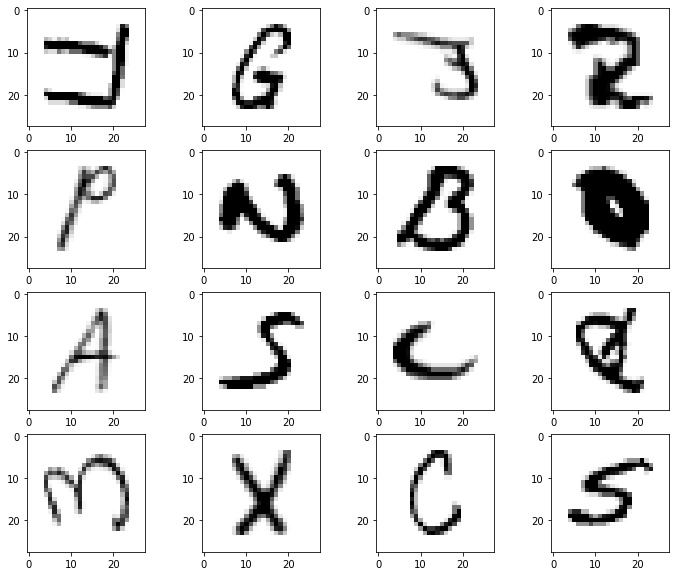

In [11]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28), cmap="Greys", interpolation='nearest')
plt.show()

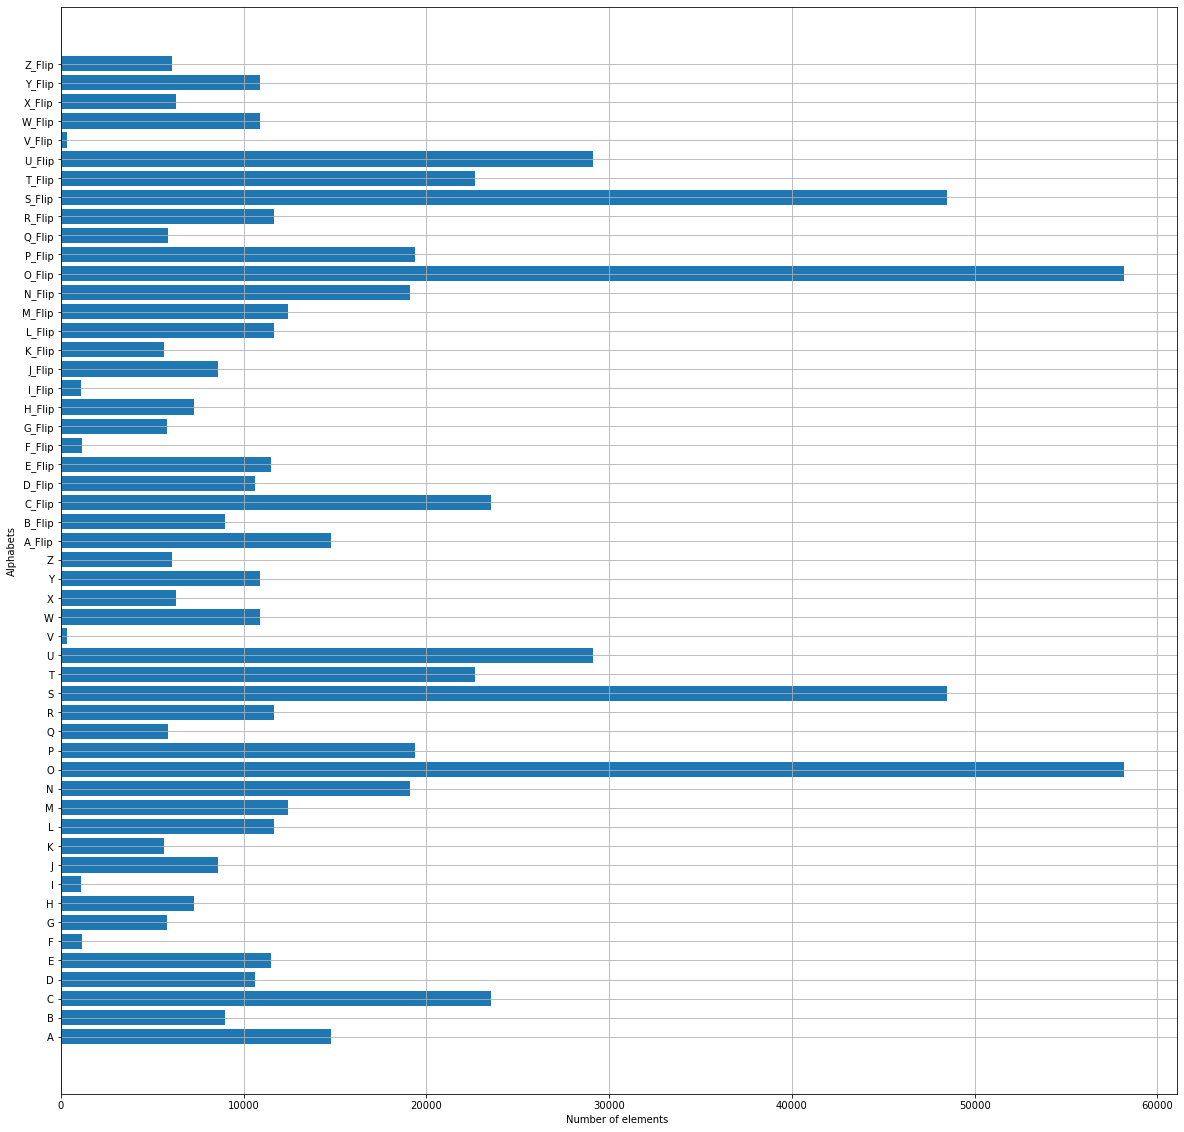

Huruf I =  1118
Huruf F =  1164


In [12]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z',26:'A_Flip',27:'B_Flip',28:'C_Flip',29:'D_Flip',30:'E_Flip',31:'F_Flip',32:'G_Flip',33:'H_Flip',34:'I_Flip',35:'J_Flip',36:'K_Flip',37:'L_Flip',38:'M_Flip',39:'N_Flip',40:'O_Flip',41:'P_Flip',42:'Q_Flip',43:'R_Flip',44:'S_Flip',45:'T_Flip',46:'U_Flip',47:'V_Flip', 48:'W_Flip',49:'X_Flip', 50:'Y_Flip',51:'Z_Flip'}
y_int = np.int64(y)
count = np.zeros(52, dtype='int') #a vector of size 26 with all 0 values
for i in y_int:
    count[i] +=1 #total count of each alphabet

alphabets = []
for i in word_dict.values():
    alphabets.append(i) #all alphabets
    
fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

print("Huruf I = ", count[8])
print("Huruf F = ", count[5])

# Data Preparation

In [13]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


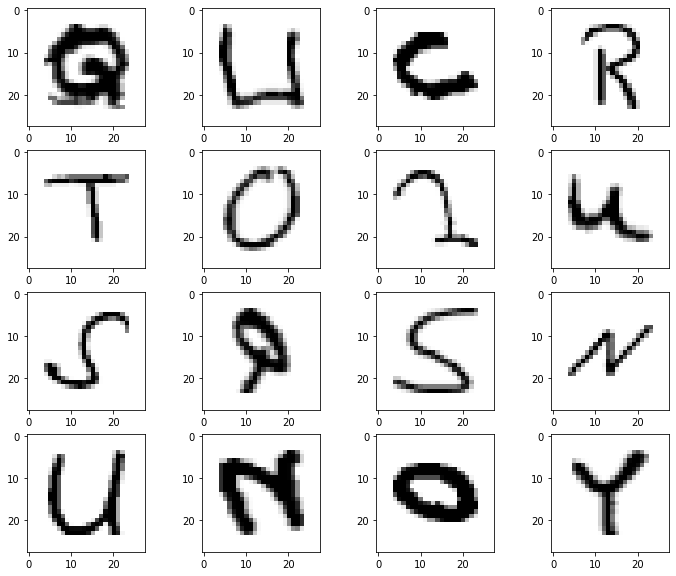

In [14]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [16]:
for key in word_dict.keys():
    print(key, " : ", word_dict[key])

0  :  A
1  :  B
2  :  C
3  :  D
4  :  E
5  :  F
6  :  G
7  :  H
8  :  I
9  :  J
10  :  K
11  :  L
12  :  M
13  :  N
14  :  O
15  :  P
16  :  Q
17  :  R
18  :  S
19  :  T
20  :  U
21  :  V
22  :  W
23  :  X
24  :  Y
25  :  Z
26  :  A_Flip
27  :  B_Flip
28  :  C_Flip
29  :  D_Flip
30  :  E_Flip
31  :  F_Flip
32  :  G_Flip
33  :  H_Flip
34  :  I_Flip
35  :  J_Flip
36  :  K_Flip
37  :  L_Flip
38  :  M_Flip
39  :  N_Flip
40  :  O_Flip
41  :  P_Flip
42  :  Q_Flip
43  :  R_Flip
44  :  S_Flip
45  :  T_Flip
46  :  U_Flip
47  :  V_Flip
48  :  W_Flip
49  :  X_Flip
50  :  Y_Flip
51  :  Z_Flip


# Build, Compile, and Training Model

# Model A (2 kali convolution)

In [134]:
# Model A
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), input_shape=(28,28,1), activation = "relu",  padding = "Same"))
model.add(Conv2D(32, kernel_size = (5, 5), activation = "relu",  padding = "Same"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.50))

model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu", padding = "Same"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.50))
model.add(Dense(len(y.unique()), activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Model B (1 kali convolution, fully functional layer + 1 Dense)

In [135]:
# model = Sequential()
# model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu', padding="Same"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(len(y.unique()), activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Model C (Reduced A)

In [136]:

# model = Sequential()
# model.add(Conv2D(32, kernel_size = (5, 5), input_shape=(28,28,1), activation = "relu",  padding = "Same"))
# model.add(Conv2D(32, kernel_size = (5, 5), activation = "relu",  padding = "Same"))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.50))

# model.add(Flatten())
# model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.50))
# model.add(Dense(len(y.unique()), activation = "softmax"))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Model D (?)

In [137]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size = (5, 5), input_shape=(28,28,1), activation = "relu",  padding = "Same"))
# model.add(Conv2D(32, kernel_size = (5, 5), activation = "relu",  padding = "Same"))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.50))

# model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu", padding = "Same"))
# model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu", padding = "Same"))
# model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu", padding = "Same"))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.50))

# model.add(Conv2D(128, kernel_size = (5, 5), activation = "relu", padding = "Same"))
# model.add(Conv2D(128, kernel_size = (5, 5), activation = "relu", padding = "Same"))
# model.add(Conv2D(128, kernel_size = (5, 5), activation = "relu", padding = "Same"))
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.50))

# model.add(Flatten())
# model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.50))
# model.add(Dense(len(y.unique()), activation = "softmax"))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Data Augmentation (Flip Horizontal and Vertical)

In [138]:
batch_size = 100
epochsize = 5

datagen = ImageDataGenerator(rotation_range = 45,  
                             vertical_flip = True,
                             horizontal_flip = True)

train_batches = datagen.flow(X_train, y_train, batch_size = batch_size)
val_batches = datagen.flow(X_test, y_test, batch_size = batch_size)

In [139]:

#fitting the model
history = model.fit_generator(train_batches,
                    epochs = epochsize,
                    validation_data = val_batches)


<ipython-input-139-e674495041f8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batches,


Epoch 1/5
5581/5581 [==============================] - 148s 26ms/step - loss: 1.4989 - accuracy: 0.3863 - val_loss: 1.0073 - val_accuracy: 0.4621
Epoch 2/5
5581/5581 [==============================] - 146s 26ms/step - loss: 1.1569 - accuracy: 0.4411 - val_loss: 0.9622 - val_accuracy: 0.4718
Epoch 3/5
5581/5581 [==============================] - 152s 27ms/step - loss: 1.1138 - accuracy: 0.4512 - val_loss: 0.9491 - val_accuracy: 0.4835
Epoch 4/5
5581/5581 [==============================] - 155s 28ms/step - loss: 1.0908 - accuracy: 0.4579 - val_loss: 0.9239 - val_accuracy: 0.4968
Epoch 5/5
5581/5581 [==============================] - 148s 26ms/step - loss: 1.0744 - accuracy: 0.4646 - val_loss: 0.9155 - val_accuracy: 0.4979


In [140]:

# Load Model and History (Model Fit)
'''import tensorflow as tf
model = tf.keras.models.load_model('model_hand.h5')
history = np.load('history.npy', allow_pickle='TRUE').item()
print(history)'''


"import tensorflow as tf\nmodel = tf.keras.models.load_model('model_hand.h5')\nhistory = np.load('history.npy', allow_pickle='TRUE').item()\nprint(history)"

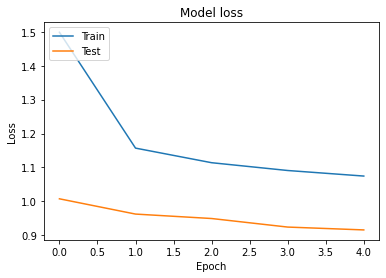

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [142]:
model.summary()
model.save(r'model_hand.h5')

np.save('history.npy', history.history)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        102464    
                                                      

# Making Prediction

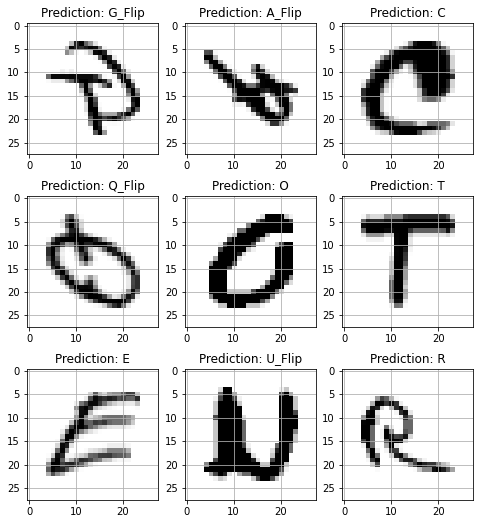

In [143]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(y_test[i])]
    ax.set_title("Prediction: " + pred)
    ax.grid()

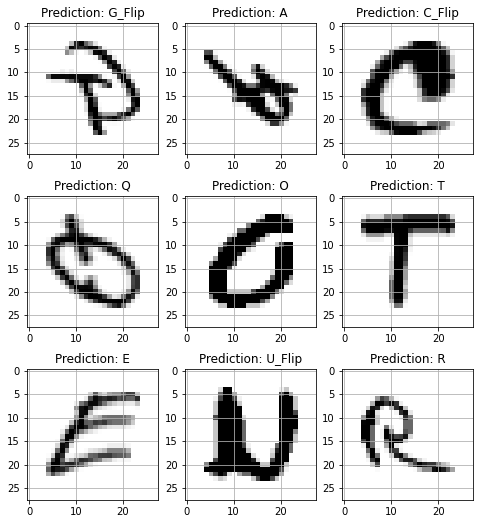

In [144]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final = np.reshape(img, (1,28,28,1)) # reshaping it for passing into model for prediction
    pred = word_dict[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

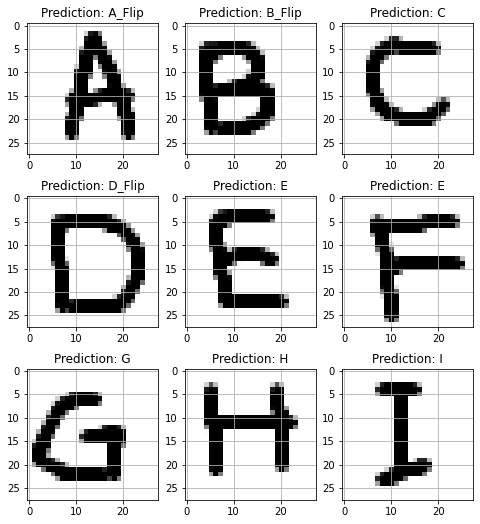

In [145]:
from PIL import Image, ImageOps

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    load_name = 'cek/Sample1/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = img.convert("L")
    img = ImageOps.invert(img) # untuk white to black, black to white
    #img = ImageOps.grayscale(img)
    ax.imshow(img, cmap="Greys")
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [146]:
jumlahbenar = 0


for i in range(26):
    load_name = 'cek/Sample1/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)
    img = np.asarray(img)
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    if (chr(i+65) == pred or chr(i+65) + "_Flip" == pred):
        jumlahbenar += 1
    print(chr(i+65) + ' = ' + pred)
    
print("Prediksi benar = " + str(jumlahbenar/26))

A = A_Flip
B = B_Flip
C = C
D = D_Flip
E = E
F = E
G = G
H = H
I = I
J = J
K = K_Flip
L = L_Flip
M = M_Flip
N = N
O = P_Flip
P = B
Q = Q
R = R_Flip
S = S_Flip
T = J_Flip
U = U_Flip
V = U_Flip
W = W
X = X_Flip
Y = Y_Flip
Z = Z
Prediksi benar = 0.8076923076923077


In [147]:
jumlahbenar = 0

for i in range(26):
    load_name = 'cek/Sample2/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)
    img = np.asarray(img)
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    if (chr(i+65) == pred or chr(i+65) + "_Flip" == pred):
        jumlahbenar += 1
    print(chr(i+65) + ' = ' + pred)
    
print("Prediksi benar = " + str(jumlahbenar/26))

A = A_Flip
B = B
C = C_Flip
D = D_Flip
E = E
F = R_Flip
G = G
H = H_Flip
I = I_Flip
J = J
K = K_Flip
L = J_Flip
M = M_Flip
N = N
O = O_Flip
P = R_Flip
Q = Q
R = R
S = S_Flip
T = K_Flip
U = U_Flip
V = U_Flip
W = W
X = X_Flip
Y = R
Z = Z
Prediksi benar = 0.7692307692307693


In [148]:
jumlahbenar = 0

for i in range(26):
    load_name = 'cek/Sample3/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)
    img = np.asarray(img)
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    if (chr(i+65) == pred or chr(i+65) + "_Flip" == pred):
        jumlahbenar += 1
    print(chr(i+65) + ' = ' + pred)
    
print("Prediksi benar = " + str(jumlahbenar/26))

A = A_Flip
B = B_Flip
C = S_Flip
D = D_Flip
E = B
F = F_Flip
G = B_Flip
H = H
I = U_Flip
J = C_Flip
K = K_Flip
L = F_Flip
M = W
N = N
O = Q
P = B_Flip
Q = Q
R = R_Flip
S = G
T = K_Flip
U = U_Flip
V = N_Flip
W = W
X = X_Flip
Y = R
Z = B_Flip
Prediksi benar = 0.46153846153846156


In [149]:
jumlahbenar = 0

for i in range(26):
    load_name = 'cek/Sample4/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)
    img = np.asarray(img)
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    if (chr(i+65) == pred or chr(i+65) + "_Flip" == pred):
        jumlahbenar += 1
    print(chr(i+65) + ' = ' + pred)
    
print("Prediksi benar = " + str(jumlahbenar/26))

A = A_Flip
B = B_Flip
C = W
D = D_Flip
E = U
F = X_Flip
G = B
H = H_Flip
I = R_Flip
J = J
K = K_Flip
L = Z
M = W
N = Z
O = O
P = R_Flip
Q = Q
R = R_Flip
S = S_Flip
T = K
U = J_Flip
V = Z_Flip
W = E
X = X_Flip
Y = R_Flip
Z = B_Flip
Prediksi benar = 0.4230769230769231


In [150]:
jumlahbenar = 0

for i in range(26):
    load_name = 'cek/Sample5/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)
    img = np.asarray(img)
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    if (chr(i+65) == pred or chr(i+65) + "_Flip" == pred):
        jumlahbenar += 1
    print(chr(i+65) + ' = ' + pred)
    
print("Prediksi benar = " + str(jumlahbenar/26))

A = A_Flip
B = B
C = C_Flip
D = D_Flip
E = B
F = E
G = G
H = H
I = I_Flip
J = J
K = K_Flip
L = E_Flip
M = M_Flip
N = N
O = O_Flip
P = P_Flip
Q = Q
R = R_Flip
S = S_Flip
T = T
U = Z_Flip
V = V_Flip
W = M_Flip
X = X_Flip
Y = R_Flip
Z = E
Prediksi benar = 0.7307692307692307


In [151]:
jumlahbenar = 0

for i in range(26):
    load_name = 'cek/Sample6/'+chr(i+65)+'.png'
    img = Image.open(load_name)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)
    img = np.asarray(img)
    img = np.reshape(img, (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    if (chr(i+65) == pred or chr(i+65) + "_Flip" == pred):
        jumlahbenar += 1
    print(chr(i+65) + ' = ' + pred)
    
print("Prediksi benar = " + str(jumlahbenar/26))

A = A_Flip
B = B
C = C
D = D_Flip
E = E
F = R_Flip
G = G
H = H
I = I_Flip
J = J_Flip
K = K_Flip
L = L
M = M_Flip
N = N
O = D_Flip
P = R
Q = Q
R = R
S = S_Flip
T = T
U = U_Flip
V = U_Flip
W = M_Flip
X = X_Flip
Y = K_Flip
Z = S_Flip
Prediksi benar = 0.7307692307692307
